In [1]:
%pylab
%matplotlib inline

from Functions import functions as f
import skimage.io as sk
from collections import Counter


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\ijung\anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:2618: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


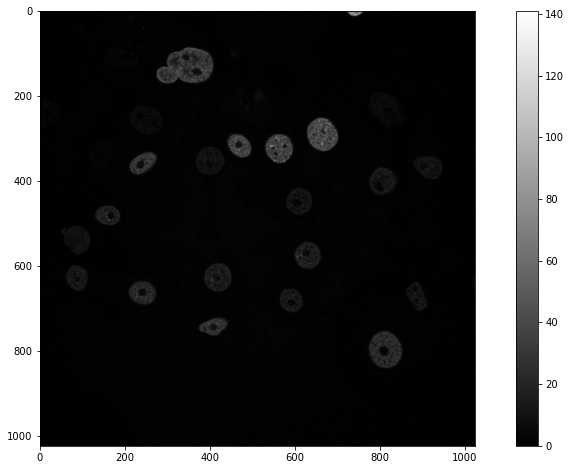

In [2]:
img = sk.imread("Data/N2DH-GOWT1/img/t01.tif") #Bild laden
f.show_image(img, 15, 8)

/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:55: RuntimeWarning: invalid value encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list
/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:55: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list
/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:55: RuntimeWarning: divide by zero encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list
/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:69: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])) # adds euclidean distance to list


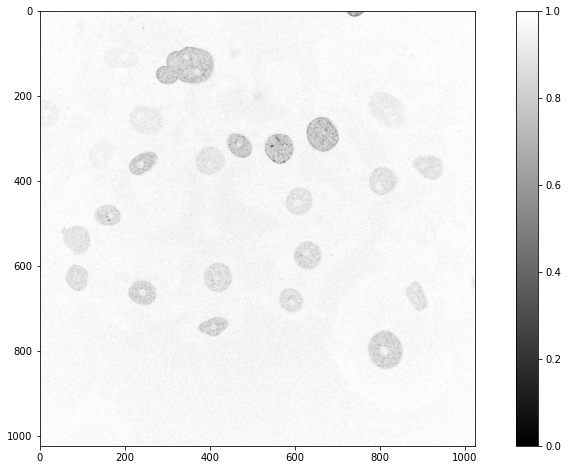

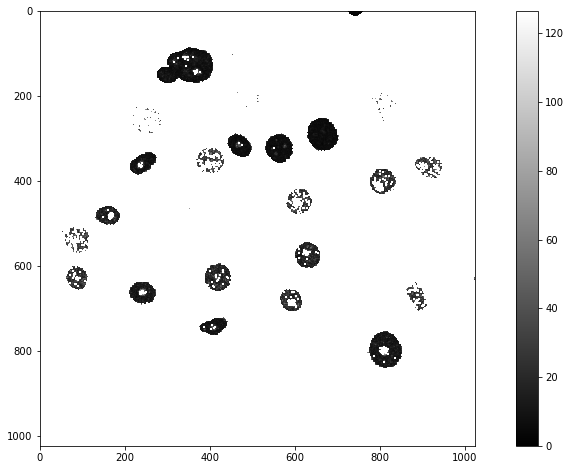

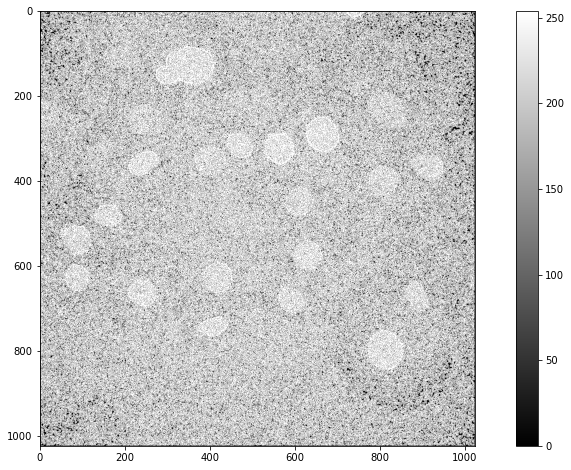

In [8]:
#calculates similarity of every pixel to its nxn neighborhood (standard deviation)
sd = f.standarddeviation(img,3) # apply method for testing
sd = sd/max(sd.flatten()) # normes standard deviation
similarity = 1-sd # calculates similarity
f.show_image(similarity, 15, 8)

#calculates relative euclidean distance of pixel to its nxn neighborhood
eurel = f.euclidean_relative(img, 3)
f.show_image(eurel, 15, 8)

#calculates relative euclidean distance of pixel to its nxn neighborhood
eu = f.euclidean_n(img, 3)
f.show_image(eu, 15, 8)

In [4]:

def seeds(img, T1, T2): # automatic seed selection algorithm
    result = numpy.zeros(img.shape)
    sd_seeds = f.standarddeviation(img,3) # standard deviation
    sd_flat = sd_seeds.flatten() # standard deviation as 1D-array
    similarity_seeds = 1 - sd_seeds/max(sd_flat) # calculates similarity of every pixel to its neighbors
    eurel_seeds = f.euclidean_relative(img, 3) # relative euclidean distance of every pixel to its neighbors
    for p in ndindex(img.shape): # border pixel value is zero
        if similarity_seeds[p] > T1 and eurel_seeds[p] < T2: # compares pixel with threshold
            result[p] = 1 # assigns value 1 to seeds
    return result



#seed_final = seeds(img, 0.4, 40)
#f.show_image(seed_final, 15, 8)



In [5]:
def seed_merging(img):
    regions = np.zeros(img.shape) #creates new array for region numbers for every image pixel
    count = 1 #keep track of region number
    for p in np.ndindex(img.shape): #iterates over every pixel of the image
        if img[p] == 1: #tests if pixel is seed
            if p[0]-1 >= 0 and p[1]-1 >= 0 and p[0]+1 <= img.shape[0] -1 and p[1]+1 <= img.shape[1] -1: # no calculation of border pixels
                for q in np.ndindex(3, 3): # iterates over 3x3 neighborhood
                    i = p[0]-1 + q[0]
                    j = p[1]-1 + q[1]
                    if regions[i,j] != 0: #tests if neighbors are also seeds
                        regions[p] = regions[i,j] # merge neighboring seeds; wird zur letzten abgefragten Region zugeordnet
                if regions[p] == 0: #tests if no neighbors are seeds
                    regions[p] = count #creates new region from new seed
                    count += 1
    return regions

test = seed_merging(seeds(f.img_resize(img, 500, 500), 0.4, 40))
print(test)

C:\Users\ijung\PycharmProjects\2021-topic-04-team-04\Functions\functions.py:55: RuntimeWarning: invalid value encountered in double_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list
C:\Users\ijung\PycharmProjects\2021-topic-04-team-04\Functions\functions.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list


[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...  108.  108.    0.]
 [   0.    0.    0. ...  108.  108.    0.]
 ...
 [   0.    0.    0. ... 1900. 1900.    0.]
 [   0. 2574.    0. ...    0. 1900.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


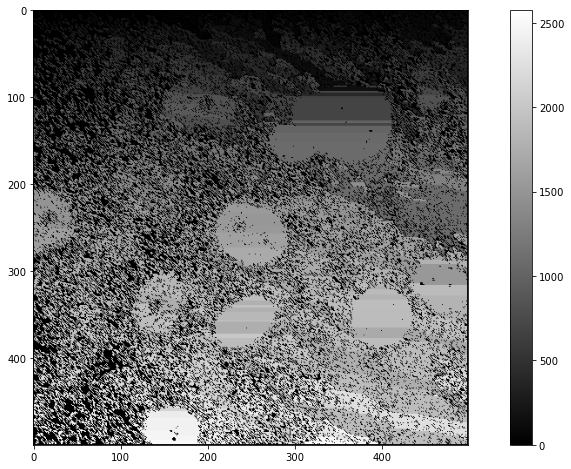

In [8]:
#reduce number of starting regions for region growing by only considering starting regions with more than T seeds
def decrease_region_number(img, T):
    list = Counter(img.flatten()) #counts number of seeds in region
    d_seeds = img.copy() 
    for i in range(1, int(np.amax(img))): #iterates over every region
        if list[i] <= T:#if number of seeds is smaller than threshold, delete region
            for p in np.ndindex(img.shape):
                if img[p] == i:
                    d_seeds[p] = 0
    return d_seeds

test2 = decrease_region_number(test, 5)
f.show_image(test2, 15, 8)